In [20]:
# script to create pandas data frame full of attributes (flight, instrument used, etc) 
# author: sofia chelpon
# date created: 2-12-2020

In [23]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 
import seaborn as sns

import datetime as dt 

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [24]:
# load in both toga and awas data
mypath1 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_trace_gases_twp.nc'
awas_trc = xr.open_dataset(mypath1)

mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp.nc'
toga_trc = xr.open_dataset(mypath2)

In [25]:
## flight date info (UTC)
#RF 03 ---> 2014-01-17 00:16:06
#RF 04 ---> 2014-01-19 00:29:14
#RF 05 ---> 2014-01-22 00:18:06
#RF 08 ---> 2014-02-01 04:04:05
#RF 09 ---> 2014-02-04 00:00:06
#RF 10 ---> 2014-02-08 00:18:05
#RF 12 ---> 2014-02-17 00:04:05
#RF 14 ---> 2014-02-22 00:08:05      
        
#NOT ALL FLIGHT DAYS START/END SAME DAY 
#RF06 starts on 2014-01-24 23:54:06 and ends on 2014-01-25 07:04:06
#RF07 starts on 2014-01-28 23:53:06 and ends on 2014-01-29 06:13:06
#RF11 starts on 2014-02-12 23:59:25 and ends on 2014-02-13 06:29:25
#RF13 starts on 2014-02-19 17:02:05 and ends on 2014-02-20 00:20:03

In [26]:
################# -------------------- TOGA  -------------------- #################

In [27]:
# TOGA - sort flights dates into flight names and notes (from Pan, BAMS 2017) for adding to dataframe 
myflights = []
flightnotes = []

for ii in toga_trc.Time_UTC.values:
    t = np.datetime64(ii)
#RF 03 ---> 2014-01-17 00:16:06
    if (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 17):
        myflights.append('RF03')
        flightnotes.append('Domain survey, 1 - Guam to SE (Chuuk)')
#RF 04 ---> 2014-01-19 00:29:14
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 19):
        myflights.append('RF04')
        flightnotes.append('Domain survey, 1 - Guam to SW (Palau)')
#RF 05 ---> 2014-01-22 00:18:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 22):
        myflights.append('RF05')
        flightnotes.append('Convective outflow, 2 - North of Guam')
#RF06 starts on 2014-01-24 23:54:06 and ends on 2014-01-25 07:04:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 24):
        myflights.append('RF06')
        flightnotes.append('Jet crossing/pre–postfrontal contrast, 4, 5 - N/NW of Guam, entering Fukuoka FIR (JPN)')
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 25):
        myflights.append('RF06')
        flightnotes.append('Jet crossing/pre–postfrontal contrast, 4, 5 - N/NW of Guam, entering Fukuoka FIR (JPN)')
#RF07 starts on 2014-01-28 23:53:06 and ends on 2014-01-29 06:13:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 28):
        myflights.append('RF07')
        flightnotes.append('SH convective outflow survey, 1, 4 - Guam to equatorial region')
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 29):
        myflights.append('RF07')
        flightnotes.append('SH convective outflow survey, 1, 4 - Guam to equatorial region')
#RF 08 ---> 2014-02-01 04:04:05
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 1):
        myflights.append('RF08')
        flightnotes.append('Photochemical evolution– sunset, 3, 7 - Guam to E (stagnation point of A.C.)')
#RF 09 ---> 2014-02-04 00:00:06
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 4):
        myflights.append('RF09')
        flightnotes.append('Equatorial crossing and Manus ozonesonde, 2, 6 - Guam to Port Moresby FIR (PNG)')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 5):
        myflights.append('RF09')
        flightnotes.append('Equatorial crossing and Manus ozonesonde, 2, 6 - Guam to Port Moresby FIR (PNG)')
#RF 10 ---> 2014-02-08 00:18:05 
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 8):
        myflights.append('RF10')
        flightnotes.append('Subtropical jet pollution and ITCZ survey, 2, 5 - Guam to near equator crossing ITCZ near 6°N')
#RF11 starts on 2014-02-12 23:59:25 and ends on 2014-02-13 06:29:25
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 12):
        myflights.append('RF11')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SW')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 13):
        myflights.append('RF11')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SW')
#RF 12 ---> 2014-02-17 00:04:05
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 17):
        myflights.append('RF12')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SE')
#RF13 starts on 2014-02-19 17:02:05 and ends on 2014-02-20 00:20:03
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 19):
        myflights.append('RF13')
        flightnotes.append('Photochemical evolution– sunrise, 3 - Guam to E (stagnation point of A.C.)')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 20):
        myflights.append('RF13')
        flightnotes.append('Photochemical evolution– sunrise, 3 - Guam to E (stagnation point of A.C.)')
#RF 14 ---> 2014-02-22 00:08:05 
    else: 
        myflights.append('RF14')
        flightnotes.append('Equator crossing, SH TTL survey, and Manus ozon- esonde, 1, 2, 6 - Guam to Port Moresby FIR (PNG) and Brisbane FIR (AUS)')

In [28]:
# put toga into one dataframe, start building with time 
toga_df = pd.DataFrame({"Time_UTC": toga_trc.Time})
toga_df.insert(1, 'Intrument', 'TOGA')

# add flight name and notes 
toga_df.insert(1, 'Flight', myflights)
toga_df.insert(2, 'Notes', flightnotes)

# add attributes 
toga_df['GGALT'] = toga_trc.GGALT
toga_df['GGLAT'] = toga_trc.GGLAT
toga_df['GGLON'] = toga_trc.GGLON
toga_df['WIC'] = toga_trc.WIC


# add all tracers back in 
for ii in toga_trc.data_vars:
    toga_df[str(ii)] = toga_trc[ii]

# pickle it! 
toga_df.to_pickle("./toga_data_df_twp.pkl")

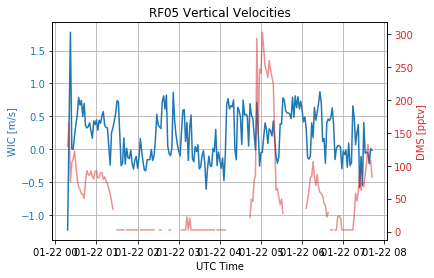

In [29]:
# do rf05 vertical velocities coincide with a VSL enhancement?
rf05 = toga_df[toga_df['Flight'] == 'RF05']

fig, ax1 = plt.subplots()

# wic 
color = 'tab:blue'
ax1.set_xlabel('UTC Time')
ax1.set_ylabel('WIC [m/s]', color=color)
ax1.plot(rf05.Time_UTC, rf05.WIC, label = 'WIC', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(which = 'major')
ax1.set_title('RF05 Vertical Velocities')
# dms 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('DMS [pptv]', color=color)  # we already handled the x-label with ax1
ax2.plot(rf05.Time_UTC, rf05.Acetaldehyde, label = 'DMS', color=color, alpha = 0.5)
ax2.tick_params(axis='y', labelcolor=color)

In [30]:
################# -------------------- AWAS  -------------------- #################

In [31]:
# AWAS - sort flights dates into flight names and notes (from Pan, BAMS 2017) for adding to dataframe 
myflights = []
flightnotes = []

for ii in awas_trc.Time_UTC.values:
    t = np.datetime64(ii)
#RF 03 ---> 2014-01-17 00:16:06
    if (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 17):
        myflights.append('RF03')
        flightnotes.append('Domain survey, 1 - Guam to SE (Chuuk)')
#RF 04 ---> 2014-01-19 00:29:14
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 19):
        myflights.append('RF04')
        flightnotes.append('Domain survey, 1 - Guam to SW (Palau)')
#RF 05 ---> 2014-01-22 00:18:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 22):
        myflights.append('RF05')
        flightnotes.append('Convective outflow, 2 - North of Guam')
#RF06 starts on 2014-01-24 23:54:06 and ends on 2014-01-25 07:04:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 24):
        myflights.append('RF06')
        flightnotes.append('Jet crossing/pre–postfrontal contrast, 4, 5 - N/NW of Guam, entering Fukuoka FIR (JPN)')
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 25):
        myflights.append('RF06')
        flightnotes.append('Jet crossing/pre–postfrontal contrast, 4, 5 - N/NW of Guam, entering Fukuoka FIR (JPN)')
#RF07 starts on 2014-01-28 23:53:06 and ends on 2014-01-29 06:13:06
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 28):
        myflights.append('RF07')
        flightnotes.append('SH convective outflow survey, 1, 4 - Guam to equatorial region')
    elif (pd.to_datetime(t).month == 1) and (pd.to_datetime(t).day == 29):
        myflights.append('RF07')
        flightnotes.append('SH convective outflow survey, 1, 4 - Guam to equatorial region')
#RF 08 ---> 2014-02-01 04:04:05
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 1):
        myflights.append('RF08')
        flightnotes.append('Photochemical evolution– sunset, 3, 7 - Guam to E (stagnation point of A.C.)')
#RF 09 ---> 2014-02-04 00:00:06
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 4):
        myflights.append('RF09')
        flightnotes.append('Equatorial crossing and Manus ozonesonde, 2, 6 - Guam to Port Moresby FIR (PNG)')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 5):
        myflights.append('RF09')
        flightnotes.append('Equatorial crossing and Manus ozonesonde, 2, 6 - Guam to Port Moresby FIR (PNG)')
#RF 10 ---> 2014-02-08 00:18:05 
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 8):
        myflights.append('RF10')
        flightnotes.append('Subtropical jet pollution and ITCZ survey, 2, 5 - Guam to near equator crossing ITCZ near 6°N')
#RF11 starts on 2014-02-12 23:59:25 and ends on 2014-02-13 06:29:25
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 12):
        myflights.append('RF11')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SW')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 13):
        myflights.append('RF11')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SW')
#RF 12 ---> 2014-02-17 00:04:05
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 17):
        myflights.append('RF12')
        flightnotes.append('Convective outflow and coordinate flight, 2, 6, 7 - Guam to S/SE')
#RF13 starts on 2014-02-19 17:02:05 and ends on 2014-02-20 00:20:03
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 19):
        myflights.append('RF13')
        flightnotes.append('Photochemical evolution– sunrise, 3 - Guam to E (stagnation point of A.C.)')
    elif (pd.to_datetime(t).month == 2) and (pd.to_datetime(t).day == 20):
        myflights.append('RF13')
        flightnotes.append('Photochemical evolution– sunrise, 3 - Guam to E (stagnation point of A.C.)')
#RF 14 ---> 2014-02-22 00:08:05 
    else: 
        myflights.append('RF14')
        flightnotes.append('Equator crossing, SH TTL survey, and Manus ozon- esonde, 1, 2, 6 - Guam to Port Moresby FIR (PNG) and Brisbane FIR (AUS)')

In [32]:
# put awas into one dataframe, start building with time 
awas_df = pd.DataFrame({"Time_UTC": awas_trc.Time_UTC})
awas_df.insert(1, 'Intrument', 'AWAS')

# add flight name and notes 
awas_df.insert(1, 'Flight', myflights)
awas_df.insert(2, 'Notes', flightnotes)

# add attributes 
awas_df['GGALT'] = awas_trc.GGALT
awas_df['GGLAT'] = awas_trc.GGLAT
awas_df['GGLON'] = awas_trc.GGLON

# fix RF09 - change awas date 2-5 to 2-4 
awas_rf09 = awas_df[awas_df['Flight'] == 'RF09']
for idx in awas_rf09.iterrows():
        t = idx[1].Time_UTC
        thr = t.hour
        tmin = t.minute
        tsec = t.second
        newt = dt.datetime(2014, 2, 4, thr, tmin, tsec)
        awas_df.loc[idx[0], 'Time_UTC'] = newt

# add all tracers back in 
for ii in awas_trc.data_vars:
    awas_df[str(ii)] = awas_trc[ii]

# pickle it! 
awas_df.to_pickle("./awas_data_df_twp.pkl")